https://hands-on.cloud/svm-python-tutorial/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importo le librerie che mi serviranno

In [2]:
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import chart_studio.plotly as py
import plotly as py
import plotly.graph_objects as go
import plotly.offline as pyoff

# Importo il Dataset con i dati di chi ha acqustato e qualche informazione

In [4]:
# importing the dataset
dataset = pd.read_csv('dataset_svm/customer_purchases.csv')
# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

In [5]:
dataset

Age  Salary  Purchased
0     19   19000          0
1     35   20000          0
2     26   43000          0
3     27   57000          0
4     19   76000          0
..   ...     ...        ...
395   46   41000          1
396   51   23000          1
397   50   20000          1
398   36   33000          0
399   49   36000          1

[400 rows x 3 columns]

In [7]:
# counting the total output data from purchased column
target_balance = dataset['Purchased'].value_counts().reset_index()
# dividing the output classes into two sections
target_class = go.Bar(
    name = 'Target Balance',
    x = ['Not-Purchased', 'Purchased'],
    y = target_balance['Purchased']
)
# ploting the output classes
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [17]:
target_balance

Purchased  count
0          0    257
1          1    143

# Divido il dataset in training e test set

In [8]:
# training and testing data
from sklearn.model_selection import train_test_split
# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

# Standardizzo i dati

In [9]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
# scalling the input data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# per x standardizzo in z = (x - u) / s
dove u è la media e s è la deviazione standard

# Alleno e testo il mio Linear SVM Model

In [10]:
# importing SVM module
from sklearn.svm import SVC
# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear')
# traininf the model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
# testing the model
y_pred = classifier.predict(X_test)

# Valuto le performance del modello

In [12]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.88


# Visualizziamo i risultati

<ipython-input-13-b0069558ca44>:16: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



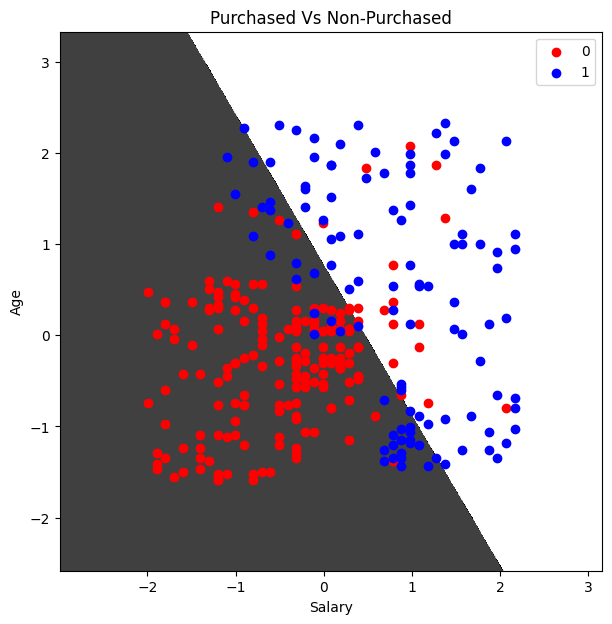

In [13]:
# importing the modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# plotting the fgiure
plt.figure(figsize = (7,7))
# assigning the input values
X_set, y_set = X_train, y_train
# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

Training And Testing Nonlinear SVM Model:  Radial Basis Function kernel

In [14]:
# importing SVM module
from sklearn.svm import SVC
# kernel to be set radial bf
classifier1 = SVC(kernel='rbf')
# traininf the model
classifier1.fit(X_train, y_train)
# testing the model
y_pred = classifier1.predict(X_test)

In [15]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.93


<ipython-input-16-d0ff92e54a55>:12: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



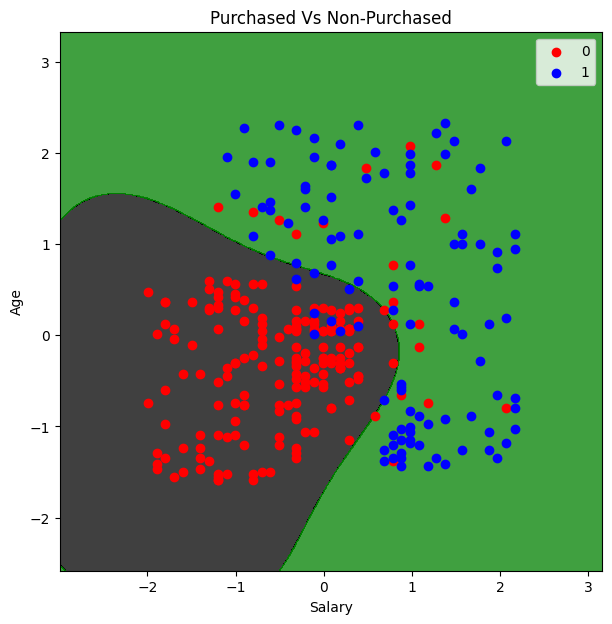

In [16]:
# plotting the fgiure
plt.figure(figsize = (7,7))
# assigning the input values
X_set, y_set = X_train, y_train
# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()